# [EDA] Heatmap & Grid-scatters
可以有效的將表格型的圖進行視覺化, 常見的 Heatmap
* 相關圖
* Confusion matrix (混淆矩陣)


# [教學目標]
- 在 EDA 中, 活用各種 Heatmap

# [範例重點]
- Heatmap 的基礎用法 : 相關矩陣的 Heatmap (In[4], Out[4])   
- Heatmap 的進階用法 : 散佈圖, KDE, 密度圖 (In[6], Out[6], In[7], Out[7])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 設定 data_path
dir_data = './data/'
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
#print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 取出 EXT_SOURCE 的幾項變數並檢驗其相關性
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


 [sns cmap顏色選擇](https://blog.csdn.net/Mr_Cat123/article/details/78638491)

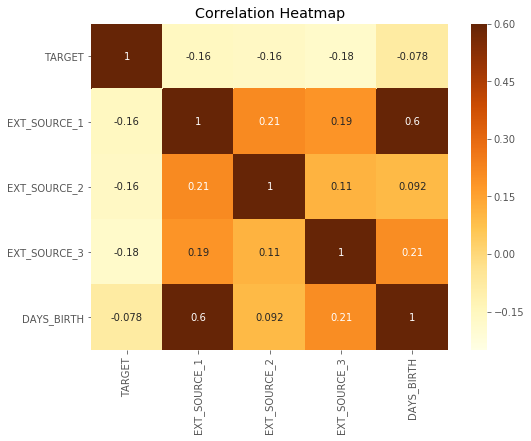

In [14]:
plt.figure(figsize = (8, 6))
# 繪製相關係數 (correlations) 的 Heatmap
#vmin vmax 最小最大值 
#cmap = colormap
sns.heatmap(ext_data_corrs, cmap = plt.cm.YlOrBr, vmin = -0.25, annot = True, vmax = 0.6) 
plt.title('Correlation Heatmap');

[python looping 技巧](https://pythonnote.wordpress.com/2014/04/03/python%E6%8A%80%E5%B7%A7%E6%BC%82%E4%BA%AE%E5%8F%88%E9%80%9A%E9%A0%86%E7%9A%84%E7%A8%8B%E5%BC%8F%E7%A2%BC/) <br><br>
[enumerate 使用](http://www.runoob.com/python/python-func-enumerate.html)

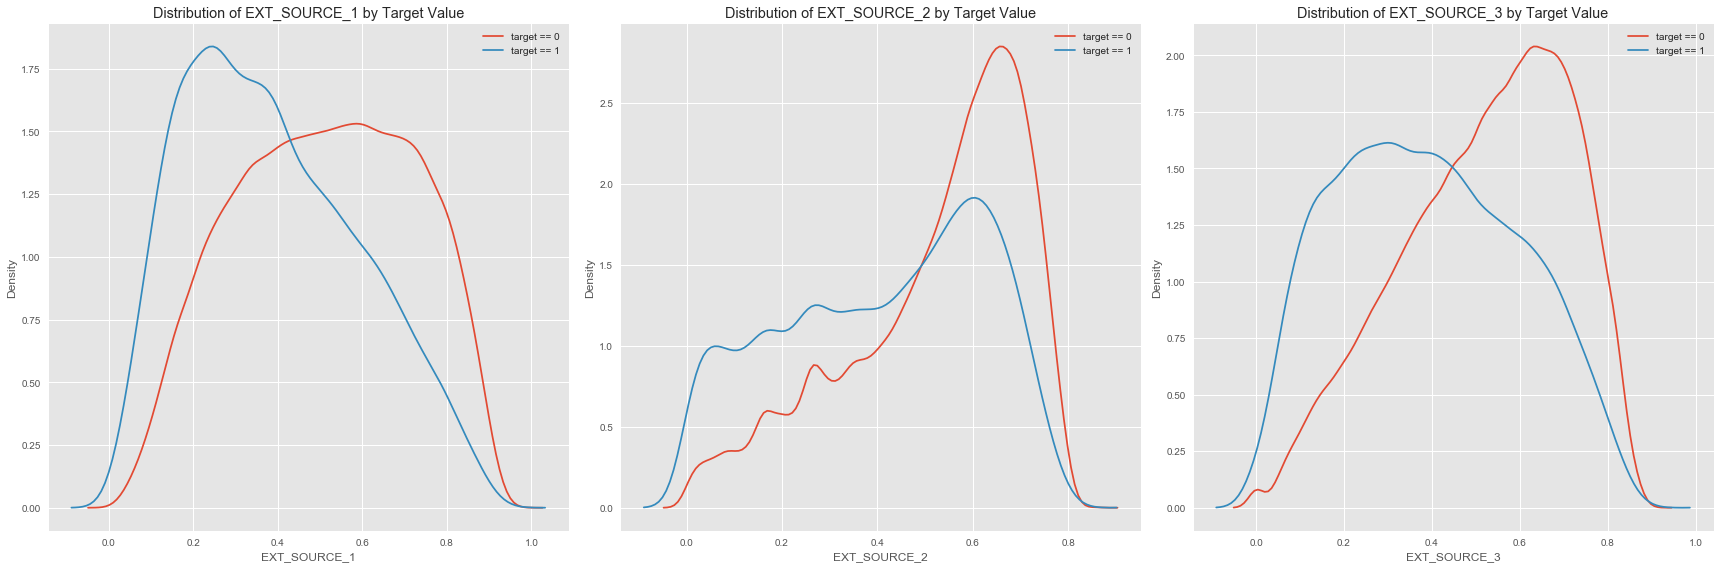

In [5]:
# 進一步我們檢查這三項變數在 Target 上的分布是否不同
plt.figure(figsize = (24, 8))

# 依不同 EXT_SOURCE 逐項繪製 KDE 圖形
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # 做 subplot
    plt.subplot(1, 3, i + 1)
    
    # KDE 圖形
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # 加上各式圖形標籤
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

[DataFrame.drop 用法](https://blog.csdn.net/songyunli1111/article/details/79306639) <br><br>
axis default=0，指删除行，因此删除columns要指定 axis=1<br><br>
inplace=False，default 刪除的操作不改變原數據，而是返回一個執行刪除操作後的新dataframe<br><br>
inplace=True，直接在原數據上進行刪除動作，刪除後無法還原。

In [16]:
# 轉成以年記齡後，將以日記齡丟掉
plot_data = ext_data.copy()
plot_data['YEARS_BIRTH'] = plot_data['DAYS_BIRTH'] / 365
plot_data.drop(['DAYS_BIRTH'],axis = 1, inplace=True) 
print(plot_data.head())

   TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BIRTH
0       1      0.083037      0.262949      0.139376    25.920548
1       0      0.311267      0.622246           NaN    45.931507
2       0           NaN      0.555912      0.729567    52.180822
3       0           NaN      0.650442           NaN    52.068493
4       0           NaN      0.322738           NaN    54.608219


In [17]:
# 定義函數 : 計算兩個 column 之間的相關係數
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

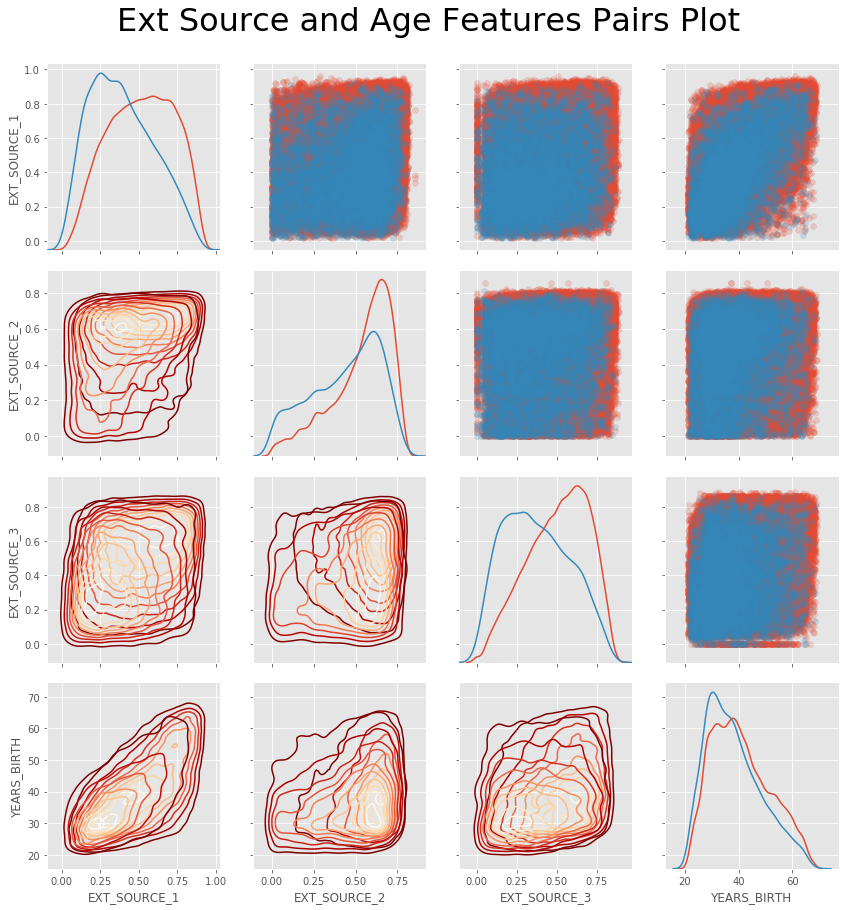

In [18]:
N_sample = 100000
# 把 NaN 數值刪去, 並限制資料上限為 100000 : 因為要畫點圖, 如果點太多，會畫很久!
plot_data = plot_data.dropna().sample(n = N_sample)
# 建立 pairgrid 物件
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

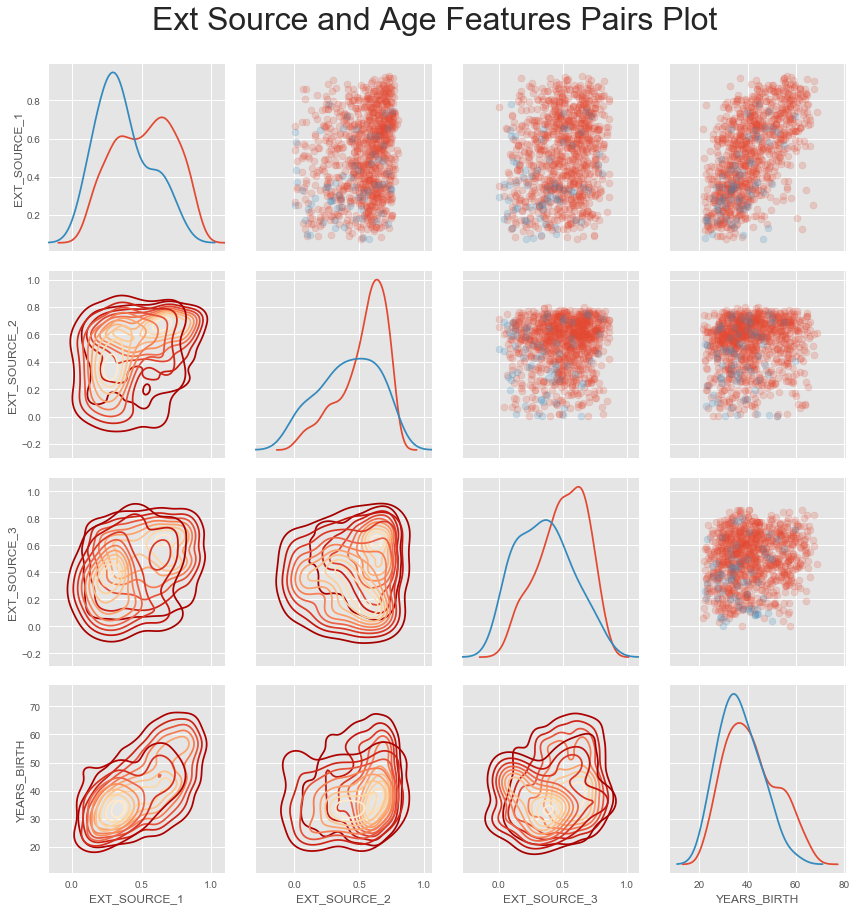

In [8]:
# 試著以不同 size 畫看看，觀察有那裡不太一樣
N_sample = 1000

plot_data = plot_data.dropna().sample(n = N_sample)
# 建立 pairgrid 物件
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap<br><br>
# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [37]:
#生成一個數值分布在-1~1的 10x10 矩陣
matrix = 2*(np.random.rand(10,10))-np.ones((10,10))
matrix

array([[ 0.6303148 ,  0.77442424,  0.39080903,  0.77293721,  0.03285271,
        -0.08231805, -0.1383465 ,  0.29918069,  0.01334815,  0.52541422],
       [-0.1662482 ,  0.87356998, -0.14776519, -0.49454439, -0.65775169,
        -0.41457644,  0.3059434 ,  0.17737109, -0.60433741, -0.23861534],
       [-0.56285276,  0.68540768,  0.2440867 , -0.82837901, -0.94106245,
        -0.30628231,  0.32446029,  0.27095295,  0.12345348, -0.7025302 ],
       [ 0.55656244, -0.90055569,  0.10389828,  0.60670519, -0.89301179,
         0.76656688, -0.43926696,  0.42233315, -0.23059222, -0.28506746],
       [-0.80033025,  0.08800168, -0.4980738 ,  0.03237929, -0.71381975,
        -0.98260159, -0.26376107, -0.34391098,  0.50430033, -0.43030796],
       [-0.51551892, -0.61659904,  0.46769712,  0.17467717, -0.16618106,
        -0.2412956 , -0.98121439, -0.91384484, -0.39600893, -0.61243734],
       [-0.59526057, -0.77011489,  0.83407592,  0.97821035, -0.39304696,
        -0.77788974,  0.18298169,  0.38716467

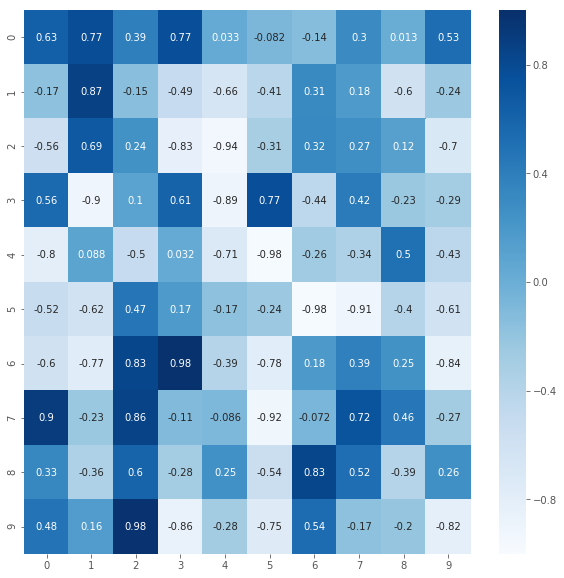

In [38]:
#heatmap
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(matrix, cmap = plt.cm.Blues, vmin = -1.0, annot = True, vmax = 1.0) 
plt.show()

In [50]:
#生成一個數值分布在-1~1的 1000x3 矩陣
nrow = 1000
ncol = 3
matrix = 2*(np.random.rand(nrow,ncol))-np.ones((nrow,ncol))
matrix

array([[ 0.18775401,  0.25481938, -0.55601293],
       [-0.07059642, -0.47479284, -0.18823998],
       [-0.88202737, -0.61424944,  0.81811666],
       ...,
       [-0.76263157, -0.92073594,  0.14337304],
       [ 0.69884272,  0.85720513,  0.01127914],
       [-0.0336964 , -0.44335851,  0.35803433]])

In [51]:
# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice)
plot_data.head()

,0,1,2
0,0.187754,0.254819,-0.556013
2,-0.070596,-0.474793,-0.188240
0,-0.882027,-0.614249,0.818117
2,0.015018,0.177362,-0.770114
0,0.212585,-0.469111,-0.262331


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


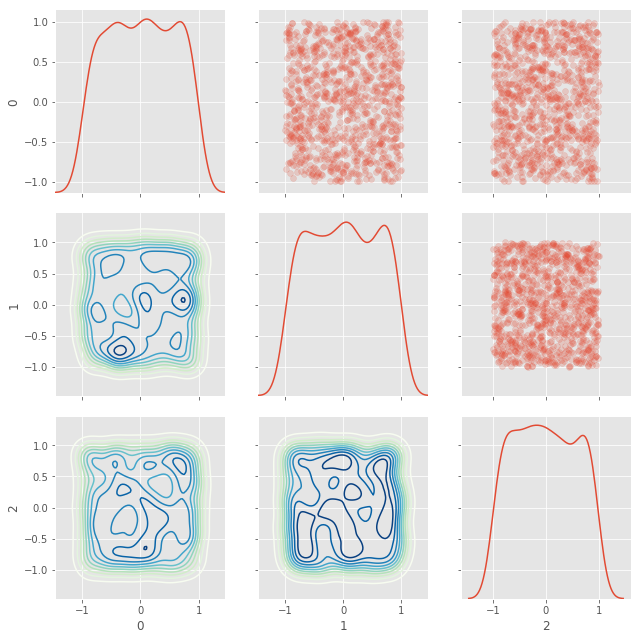

In [52]:
# 繪製 seborn 進階 Heatmap(上半部為 scatter, 對角線為 hist, 下半部為 density)
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False)

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.GnBu)

plt.show()

In [53]:
#數值分布為常態分佈的1000x3矩陣
nrow = 1000
ncol = 3
mu, sigma = 0, 0.5 
matrix = np.random.normal(mu, sigma, size = (nrow, ncol))
matrix

array([[ 0.33091612,  0.51261064, -0.36150468],
       [-0.16245712,  0.07407553,  0.25064486],
       [ 1.11546969,  0.09676567,  0.31533746],
       ...,
       [-0.26572748,  0.90372317, -0.53883327],
       [ 0.06286233, -0.34181618, -0.69312075],
       [-0.1987115 ,  0.4318982 ,  0.45530826]])

In [54]:
# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice)
plot_data.head()

,0,1,2
1,0.330916,0.512611,-0.361505
0,-0.162457,0.074076,0.250645
0,1.115470,0.096766,0.315337
2,0.086692,0.395986,-0.296511
1,0.703091,-0.172817,0.047871


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


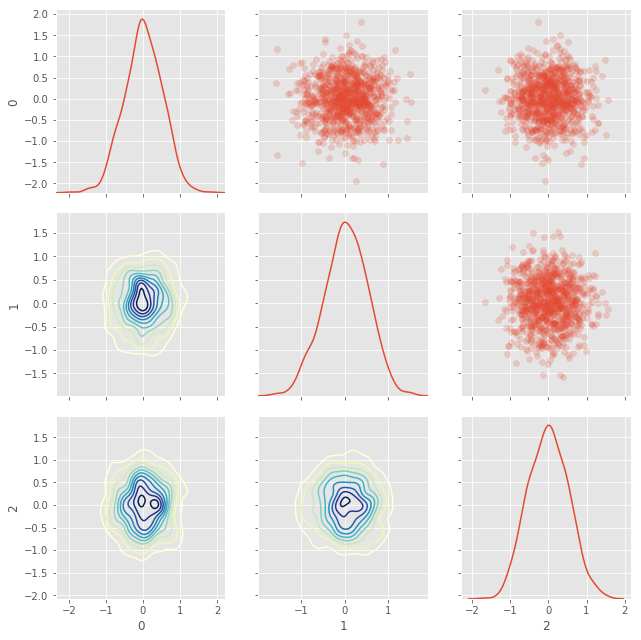

In [55]:
# 繪製 seborn 進階 Heatmap(上半部為 scatter, 對角線為 hist, 下半部為 density)
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False)

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.YlGnBu)

plt.show()